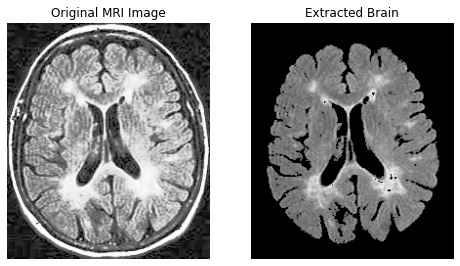

In [91]:
# 1 Region Growth
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure

def region_growing(image, seed_point, threshold):
    region = np.zeros(image.shape, dtype=bool)
    stack = [seed_point]
    region[seed_point] = True
    while stack:
        x, y = stack.pop()
        neighbors = [
            (x + 1, y),
            (x - 1, y),
            (x, y + 1),
            (x, y - 1)
        ]
        for nx, ny in neighbors:
            if nx >= 0 and nx < image.shape[0] and ny >= 0 and ny < image.shape[1] and not region[nx, ny]:
                if abs(image[nx, ny] - image[seed_point]) <= threshold:
                    stack.append((nx, ny))
                    region[nx, ny] = True
    return region

def brain_extraction(image_path, seed_point, threshold):
    # Read the image using scikit-image
    image = io.imread(image_path)

    # Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Apply Region Growing to extract the brain region
    segmented_brain = region_growing(gray_image, seed_point, threshold)

    # Apply binary thresholding to get a clear brain mask
    brain_mask = segmented_brain > 0

    # Apply the binary mask to the original image to extract the brain
    extracted_brain = np.copy(image)
    extracted_brain[~brain_mask] = 0

    return extracted_brain

def main():
    # Load the MRI brain image (provide the path to your image)
    image_path = r"E:\Images\23 no.jpg"

    # Set the seed point for Region Growing (manually or automatically)
    seed_point = (99, 99)  # Example seed point (x, y)

    # Set the threshold value for Region Growing (adjust as needed)
    threshold_value = 0.3
    

    # Perform brain extraction using Region Growing
    extracted_brain = brain_extraction(image_path, seed_point, threshold_value)

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(exposure.equalize_hist(io.imread(image_path)), cmap='gray')
    plt.title("Original MRI Image")
    plt.axis('off')

    # Display the extracted brain image
    plt.subplot(1, 2, 2)
    plt.imshow(extracted_brain)
    plt.title("Extracted Brain")
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()


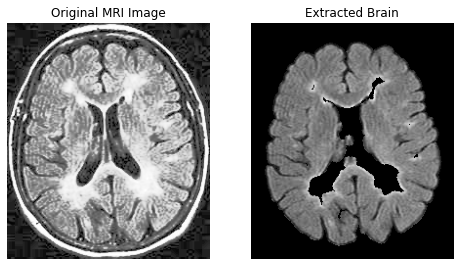

In [75]:
# 2.Morphological Operations (Erosion, Dilation)
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, morphology

def region_growing(image, seed_point, threshold):
    region = np.zeros(image.shape, dtype=bool)
    stack = [seed_point]
    region[seed_point] = True
    while stack:
        x, y = stack.pop()
        neighbors = [
            (x + 1, y),
            (x - 1, y),
            (x, y + 1),
            (x, y - 1)
        ]
        for nx, ny in neighbors:
            if nx >= 0 and nx < image.shape[0] and ny >= 0 and ny < image.shape[1] and not region[nx, ny]:
                if abs(image[nx, ny] - image[seed_point]) <= threshold:
                    stack.append((nx, ny))
                    region[nx, ny] = True
    return region

def brain_extraction(image_path, seed_point, threshold):
    # Read the image using scikit-image
    image = io.imread(image_path)

    # Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Apply Region Growing to extract the brain region
    segmented_brain = region_growing(gray_image, seed_point, threshold)

    # Apply binary thresholding to get a clear brain mask
    brain_mask = segmented_brain > 0

    # Apply Morphological Erosion to remove small noise and fine structures
    brain_mask = morphology.binary_erosion(brain_mask, morphology.disk(3))

    # Apply Morphological Dilation to expand the brain region slightly
    brain_mask = morphology.binary_dilation(brain_mask, morphology.disk(5))

    # Apply the binary mask to the original image to extract the brain
    extracted_brain = np.copy(image)
    extracted_brain[~brain_mask] = 0

    return extracted_brain

def main():
    # Load the MRI brain image (provide the path to your image)
    image_path = r"E:\Images\23 no.jpg"

    # Set the seed point for Region Growing (manually or automatically)
    seed_point = (100, 100)  # Example seed point (x, y)

    # Set the threshold value for Region Growing (adjust as needed)
    threshold_value = 0.2

    # Perform brain extraction using Region Growing
    extracted_brain = brain_extraction(image_path, seed_point, threshold_value)

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(exposure.equalize_hist(io.imread(image_path)), cmap='gray')
    plt.title("Original MRI Image")
    plt.axis('off')

    # Display the extracted brain image
    plt.subplot(1, 2, 2)
    plt.imshow(extracted_brain)
    plt.title("Extracted Brain")
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()


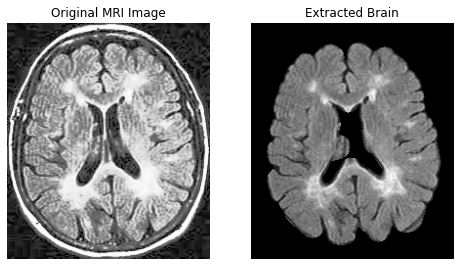

In [90]:
# 3. Level Set Methods with Chan-Vese for brain extraction
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, segmentation, morphology

def chan_vese_segmentation(image):
    return segmentation.chan_vese(image)

def brain_extraction(image_path):
    # Read the image using scikit-image
    image = io.imread(image_path)

    # Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Apply Chan-Vese segmentation for brain extraction
    segmented_brain = chan_vese_segmentation(gray_image)

    # Convert the segmentation mask to binary brain mask
    brain_mask = segmented_brain > 0.5

    # Apply Morphological Erosion to remove small noise and fine structures
    brain_mask = morphology.binary_erosion(brain_mask, morphology.disk(9))

    # Apply Morphological Dilation to expand the brain region slightly
    brain_mask = morphology.binary_dilation(brain_mask, morphology.disk(11))

    # Apply the binary mask to the original image to extract the brain
    extracted_brain = np.copy(image)
    extracted_brain[~brain_mask] = 0

    return extracted_brain

def main():
    # Load the MRI brain image (provide the path to your image)
    image_path = r"E:\Images\23 no.jpg"

    # Perform brain extraction using Chan-Vese segmentation
    extracted_brain = brain_extraction(image_path)

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(exposure.equalize_hist(io.imread(image_path)), cmap='gray')
    plt.title("Original MRI Image")
    plt.axis('off')

    # Display the extracted brain image
    plt.subplot(1, 2, 2)
    plt.imshow(extracted_brain)
    plt.title("Extracted Brain")
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()


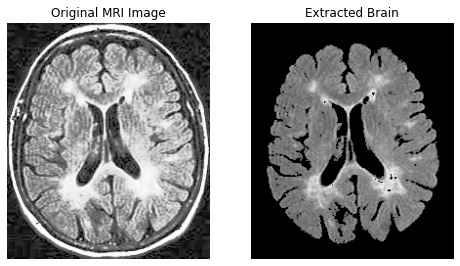

In [158]:
# 4. Hybrid method
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, feature

def region_growing(image, seed_point, threshold):
    region = np.zeros(image.shape, dtype=bool)
    stack = [seed_point]
    region[seed_point] = True
    while stack:
        x, y = stack.pop()
        neighbors = [
            (x + 1, y),
            (x - 1, y),
            (x, y + 1),
            (x, y - 1)
        ]
        for nx, ny in neighbors:
            if nx >= 0 and nx < image.shape[0] and ny >= 0 and ny < image.shape[1] and not region[nx, ny]:
                if abs(image[nx, ny] - image[seed_point]) <= threshold:
                    stack.append((nx, ny))
                    region[nx, ny] = True
    return region

def canny_edge_detection(image, sigma):
    edges = feature.canny(image, sigma=sigma)
    return edges

def hybrid_segmentation(image, seed_point, threshold, sigma):
    # Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Apply Region Growing to extract the brain region
    segmented_region = region_growing(gray_image, seed_point, threshold)

    # Apply Canny edge detection to get edge information
    edges = canny_edge_detection(gray_image, sigma)

    # Combine region and edge information using logical OR
    combined_segmentation = segmented_region | edges

    # Apply binary thresholding to get a clear brain mask
    brain_mask = combined_segmentation > 0

    # Apply the binary mask to the original image to extract the brain
    extracted_brain = np.copy(image)
    extracted_brain[~brain_mask] = 0

    return extracted_brain

def main():
    # Load the MRI brain image (provide the path to your image)
    image_path = r"E:\Images\23 no.jpg"

    # Set the seed point for Region Growing (manually or automatically)
    seed_point = (99, 99)  # Example seed point (x, y)

    # Set the threshold value for Region Growing (adjust as needed)
    threshold_value = 0.3

    # Set the sigma value for Canny edge detection (adjust as needed)
    sigma_value = 9
    # Perform brain extraction using Hybrid Method
    extracted_brain = hybrid_segmentation(io.imread(image_path), seed_point, threshold_value, sigma_value)

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(exposure.equalize_hist(io.imread(image_path)), cmap='gray')
    plt.title("Original MRI Image")
    plt.axis('off')

    # Display the extracted brain image
    plt.subplot(1, 2, 2)
    plt.imshow(extracted_brain)
    plt.title("Extracted Brain")
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()


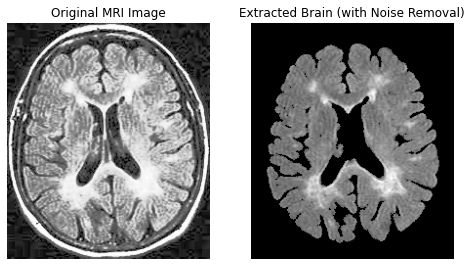

In [14]:
# 5. brain extraction using Otsu's Thresholding with noise removal

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, filters, morphology
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops

def brain_extraction_threshold(image_path, threshold_value):
    # Read the image using scikit-image
    image = io.imread(image_path)

    # Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Apply Otsu's Thresholding to obtain a binary mask
    thresholded_image = gray_image > filters.threshold_otsu(gray_image)

    # Remove small isolated regions (optional, depending on your image quality)
    thresholded_image = clear_border(thresholded_image)

    # Apply morphological operations to remove noise and fill gaps
    selem = morphology.disk(3)  # Adjust the disk size as needed
    cleaned_mask = morphology.opening(thresholded_image, selem)

    # Label connected regions
    labeled_image = label(cleaned_mask)

    # Find the largest connected region (assuming it's the brain)
    region_props = regionprops(labeled_image)
    max_area = 0
    max_label = 0
    for props in region_props:
        if props.area > max_area:
            max_area = props.area
            max_label = props.label

    # Create a mask for the largest connected region (brain)
    brain_mask = labeled_image == max_label

    # Apply the binary mask to the original image to extract the brain
    extracted_brain = np.copy(image)
    extracted_brain[~brain_mask] = 0

    return extracted_brain

def main():
    # Load the MRI brain image (provide the path to your image)
    image_path = r"E:\Images\23 no.jpg"

    # Set the threshold value for Otsu's Thresholding (adjust as needed)
    threshold_value = 0.5

    # Perform brain extraction using Otsu's Thresholding with noise removal
    extracted_brain = brain_extraction_threshold(image_path, threshold_value)

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(exposure.equalize_hist(io.imread(image_path)), cmap='gray')
    plt.title("Original MRI Image")
    plt.axis('off')

    # Display the extracted brain image
    plt.subplot(1, 2, 2)
    plt.imshow(extracted_brain)
    plt.title("Extracted Brain (with Noise Removal)")
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()
